Successfully fetched data for Mumbai.

Visualization dashboard saved as 'Mumbai_weather_dashboard.png'


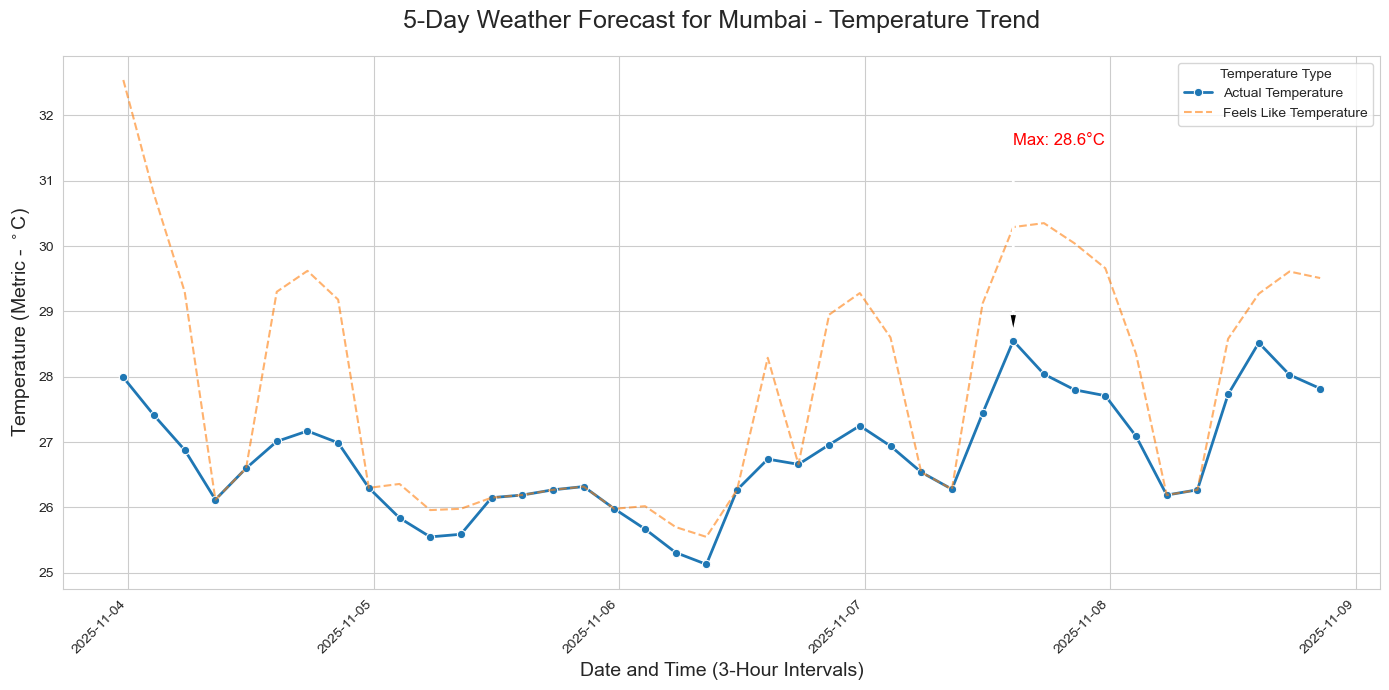

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- Configuration (REPLACE THESE) ---
API_KEY = '07cd8d6d5674a22a3c80a7936ff9e80a' # Get this from OpenWeatherMap
CITY_NAME = 'Mumbai' # Changed from London to Mumbai
UNITS = 'metric' # 'metric' for Celsius, 'imperial' for Fahrenheit

# --- OpenWeatherMap 5-day / 3-hour forecast API endpoint ---
FORECAST_URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY_NAME}&units={UNITS}&appid={API_KEY}"

def fetch_weather_data(url):
    """Fetches weather forecast data from the OpenWeatherMap API."""
    try:
        response = requests.get(url)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        data = response.json()
        print(f"Successfully fetched data for {CITY_NAME}.")
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

def process_data(json_data):
    """Extracts and structures relevant data into a Pandas DataFrame."""
    if not json_data or 'list' not in json_data:
        print("No valid data to process.")
        return pd.DataFrame()

    forecast_list = json_data['list']
    data = []

    for item in forecast_list:
        timestamp = datetime.fromtimestamp(item['dt'])
        temp = item['main']['temp']
        feels_like = item['main']['feels_like']
        description = item['weather'][0]['description']

        data.append({
            'Time': timestamp,
            'Temperature_C': temp,
            'Feels_Like_C': feels_like,
            'Description': description
        })

    df = pd.DataFrame(data)
    return df

def create_visualization_dashboard(df, city):
    """Creates a time series plot of temperature using Matplotlib and Seaborn."""
    if df.empty:
        print("Cannot visualize empty data.")
        return

    # Set up the visualization style
    sns.set_style("whitegrid")
    
    # Create the figure and a single subplot
    plt.figure(figsize=(14, 7))
    
    # Use Seaborn's lineplot for the main temperature
    sns.lineplot(
        x='Time', 
        y='Temperature_C', 
        data=df, 
        label='Actual Temperature', 
        marker='o', 
        linewidth=2
    )
    
    # Add a line for 'Feels Like' temperature
    sns.lineplot(
        x='Time', 
        y='Feels_Like_C', 
        data=df, 
        label='Feels Like Temperature', 
        linestyle='--', 
        alpha=0.6
    )

    # --- Dashboard Customization ---
    plt.title(f'5-Day Weather Forecast for {city} - Temperature Trend', fontsize=18, pad=20)
    plt.xlabel('Date and Time (3-Hour Intervals)', fontsize=14)
    plt.ylabel(f'Temperature ({UNITS.capitalize()} - $^\circ$C)', fontsize=14)
    plt.xticks(rotation=45, ha='right') # Rotate date labels for better fit
    plt.legend(title='Temperature Type', loc='upper right')
    plt.tight_layout() # Adjust plot to prevent labels from being cut off
    
    # Highlight the current maximum temperature
    max_temp = df['Temperature_C'].max()
    max_time = df.loc[df['Temperature_C'].idxmax(), 'Time']
    plt.annotate(
        f'Max: {max_temp:.1f}°C', 
        xy=(max_time, max_temp), 
        xytext=(max_time, max_temp + 3),
        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
        fontsize=12,
        color='red'
    )
    
    # Save the plot
    plot_filename = f'{city}_weather_dashboard.png'
    plt.savefig(plot_filename)
    print(f"\nVisualization dashboard saved as '{plot_filename}'")
    plt.show()

# --- Main Script Execution ---
if __name__ == "__main__":
    # 1. Fetch Data
    weather_json = fetch_weather_data(FORECAST_URL)
    
    # 2. Process Data
    weather_df = process_data(weather_json)
    
    # 3. Create Visualization
    if not weather_df.empty:
        create_visualization_dashboard(weather_df, CITY_NAME)
    else:
        print("Task failed: Could not generate visualization due to missing or invalid data.")